## Подготовка данных ##

Начинаем исследование с постановки задачи:
Имеется два тарифных плана: «Смарт» и «Ультра», необходимо определить, какой ТП приносит больше денег.

Импортируем библиотеки:

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn

Откроем файлы с данными и передадим их значения в соответвующие переменные.

In [2]:

calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv',index_col=0) #  index_col=0 чтобы в таблице не создавался отдельный столбец "Unnamed: 0"
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

Изучим данные в полученных таблицах

In [3]:
table_of_tables = [calls, internet, messages, tariffs, users]
name_of_tables = ['calls', 'internet', 'messages', 'tariffs', 'users' ]
for item in range(len(table_of_tables)):
    print('Информация по таблице', name_of_tables[item],':')
    display(table_of_tables[item])
    table_of_tables[item].info()
    print()

Информация по таблице calls :


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB

Информация по таблице internet :


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB

Информация по таблице messages :


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB

Информация по таблице tariffs :


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes

Информация по таблице users :


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB



Описание данных в таблицах и комментарии по тем, данным, на которые стоит обратить внимание:

**Таблица calls (информация о звонках)**:
- id           202607 non-null object — уникальный номер звонка
- call_date    202607 non-null object — дата звонка **преобразовать в дату**
- duration     202607 non-null float64 — длительность звонка в минутах **округлить до мин и преобразовать в int**
- user_id      202607 non-null int64 — идентификатор пользователя, сделавшего звонок


**Таблица internet (информация об интернет-сессиях):**

- id              149396 non-null object — уникальный номер сессии
- mb_used         149396 non-null float64 — объём потраченного за сессию интернет-трафика (в мегабайтах) 
- session_date    149396 non-null object — дата интернет-сессии **преобразовать в дату**
- user_id         149396 non-null int64 — идентификатор пользователя


**Таблица messages (информация о сообщениях):**

- id              123036 non-null object — уникальный номер сообщения
- message_date    123036 non-null object — дата сообщения **преобразовать в дату**
- user_id         123036 non-null int64 — идентификатор пользователя, отправившего сообщение


**Таблица tariffs (информация о тарифах):**

- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

**Таблица users (информация о пользователях):**

- user_id       500 non-null int64 — уникальный идентификатор пользователя
- first_name    500 non-null object — имя пользователя
- last_name     500 non-null object — фамилия пользователя
- age           500 non-null int64 — возраст пользователя (годы)
- reg_date      500 non-null object — дата подключения тарифа (день, месяц, год)
- churn_date    38 non-null object — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff        500 non-null object — название тарифного плана

## Подготовка пользовательских данных ##

Привем данные к нужным типам, а также Найдем и исправиме ошибки в них.

В таблицах "calls", "internet", "messages" и "users" значения стобцов, в которых указаны даты требуют преобразования типов данных из object в date:

In [4]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')

В таблице "tariffs" произведем переименование столбца тариф, это поможет в дальнейшем для объединения таблиц по этому столбцу

In [5]:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


«Мегалайн» всегда округляет секунды до минут.Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Округлим значения столбца в большую сторону и преобразуем данные в целочисленный тип значений

In [6]:
print('Значения столбца до преобразования: \n',calls['duration'].head())
calls['duration'] = np.ceil(calls['duration'])
calls['duration'] = calls['duration'].astype('int')
print('Значения столбца после преобразования: \n', calls['duration'].head())

Значения столбца до преобразования: 
 0     0.00
1     0.00
2     2.85
3    13.80
4     5.18
Name: duration, dtype: float64
Значения столбца после преобразования: 
 0     0
1     0
2     3
3    14
4     6
Name: duration, dtype: int64


В таблице 'calls' в столбце duration присутствуют нулевые значения: так обозначены пропущенные звонки. 

Проверим нулевые значения в таблице 'internet':

In [7]:
print(internet[internet['mb_used'] == 0]['mb_used'].count())
internet[internet['mb_used'] == 0].head()

19598


,id,mb_used,session_date,user_id
11,1000_11,0.0,2018-08-28,1000
38,1000_38,0.0,2018-11-27,1000
46,1000_46,0.0,2018-06-30,1000
67,1000_67,0.0,2018-06-16,1000
72,1000_72,0.0,2018-06-15,1000


В значениях интернет-трафика, потраченного за сессию, числится 19598 нулевых. Причина их появления скорее всего особенность билинговой системы. Поскольку эти значения не несут никакой полезной информации, уберем их:

In [8]:
print("Информация по таблице до удаления нулевых значений \n") 
internet.info()
internet = internet.query("mb_used != 0").reset_index(drop=True)
print(" \n Информация по таблице до удаления нулевых значений \n")
internet.info()

Информация по таблице до удаления нулевых значений 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB
 
 Информация по таблице до удаления нулевых значений 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129798 entries, 0 to 129797
Data columns (total 4 columns):
id              129798 non-null object
mb_used         129798 non-null float64
session_date    129798 non-null datetime64[ns]
user_id         129798 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.0+ MB


- user_id       500 non-null int64 — уникальный идентификатор пользователя
- first_name    500 non-null object — имя пользователя
- last_name     500 non-null object — фамилия пользователя
- age           500 non-null int64 — возраст пользователя (годы)
- reg_date      500 non-null object — дата подключения тарифа (день, месяц, год)
- churn_date    38 non-null object — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff        500 non-null object — название тарифного плана

In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


Нам предстоит посчитать для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану).

А для это в таблицах не хватает данных - месяца, в котором совершаются операции.
В таблицах "calls", "internet" и "messages" добавим столбец "month" и сгруппируем каждую таблицу по пользователям и месяцам, в которых были совершены действия.


In [10]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
display(calls.head(),internet.head(),messages.head())

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [11]:
calls_grouped = calls.groupby(['user_id','month']).agg({'duration':'sum'}).reset_index()
display('Сгруппированная таблица calls',calls_grouped)
internet_grouped = internet.groupby(['user_id','month']).agg({'mb_used':'sum'}).reset_index()
display('Сгруппированная таблица internet',internet_grouped)
messages_grouped = messages.groupby(['user_id','month']).agg({'id':'count'}).reset_index()
display('Сгруппированная таблица messages', messages_grouped)

'Сгруппированная таблица calls'

,user_id,month,duration
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466
...,...,...,...
3169,1498,10,247
3170,1499,9,70
3171,1499,10,449
3172,1499,11,612


'Сгруппированная таблица internet'

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3196,1498,10,20579.36
3197,1499,9,1845.75
3198,1499,10,17788.51
3199,1499,11,17963.31


'Сгруппированная таблица messages'

,user_id,month,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


В полученных таблицах необходимо произвести преобразования:
1. Переименуем столбцы в соответствии со смыслом их значений
2. В таблице "internet" преобразуем МБ в ГБ округлим значения в большую сторону(учитывая, что 1024 Мб = 1Гб) и преобразуем в целочисленные значения
3. В таблице "tariffs"  значения столбца "mb_per_month_included" из МБ переведем в ГБ

In [12]:
calls_grouped = calls_grouped.rename(columns={'duration':'duration_total'})
internet_grouped = internet_grouped.rename(columns={'mb_used':'gb_used_total'})
messages_grouped = messages_grouped.rename(columns={'id':'messages_total'})
display('Таблица до преобразования:', internet_grouped.head())
internet_grouped['gb_used_total'] = np.ceil(internet_grouped['gb_used_total']/1024)
display('Таблица после преобразования:', internet_grouped.head())
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included']/1024
tariffs = tariffs.rename(columns={'mb_per_month_included':'gb_per_month_included'})
tariffs['gb_per_month_included'] = tariffs['gb_per_month_included'].astype('int')
messages_grouped

'Таблица до преобразования:'

,user_id,month,gb_used_total
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


'Таблица после преобразования:'

,user_id,month,gb_used_total
0,1000,5,3.0
1,1000,6,23.0
2,1000,7,14.0
3,1000,8,14.0
4,1000,9,15.0


,user_id,month,messages_total
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


Произведем последовательное объединение таблиц:

In [13]:
traffic = calls_grouped.merge(internet_grouped, on=['user_id','month'], how='outer')
traffic = traffic.merge(messages_grouped, on=['user_id','month'], how='outer')
traffic

,user_id,month,duration_total,gb_used_total,messages_total
0,1000,5,159.0,3.0,22.0
1,1000,6,172.0,23.0,60.0
2,1000,7,340.0,14.0,75.0
3,1000,8,408.0,14.0,81.0
4,1000,9,466.0,15.0,57.0
...,...,...,...,...,...
3209,1489,8,NaN,11.0,17.0
3210,1489,9,NaN,17.0,32.0
3211,1489,10,NaN,20.0,21.0
3212,1489,11,NaN,18.0,20.0


Внесем изменения в полученную таблицу:

Изменим тип данных на целочисленные **с учетом наличия в данных значений NaN**

In [14]:
traffic.info()
#traffic['gb_used_total'] = traffic['gb_used_total'].fillna(0)
#traffic['messages_total'] = traffic['messages_total'].fillna(0)
traffic['duration_total'] = traffic['duration_total'].astype('Int64')
traffic['messages_total'] = traffic['messages_total'].astype('Int64')
traffic['gb_used_total'] = traffic['gb_used_total'].astype('Int64')
traffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 5 columns):
user_id           3214 non-null int64
month             3214 non-null int64
duration_total    3174 non-null float64
gb_used_total     3201 non-null float64
messages_total    2717 non-null float64
dtypes: float64(3), int64(2)
memory usage: 150.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 5 columns):
user_id           3214 non-null int64
month             3214 non-null int64
duration_total    3174 non-null Int64
gb_used_total     3201 non-null Int64
messages_total    2717 non-null Int64
dtypes: Int64(3), int64(2)
memory usage: 160.1 KB


In [15]:
traffic = traffic.merge(users, on='user_id', how='left')
traffic

,user_id,month,duration_total,gb_used_total,messages_total,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,159,3,22,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,172,23,60,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,340,14,75,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,408,14,81,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,466,15,57,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,11,17,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3210,1489,9,NaN,17,32,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3211,1489,10,NaN,20,21,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,11,NaN,18,20,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart


In [16]:
traffic = traffic.merge(tariffs, on='tariff', how='left')
traffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 19 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
duration_total           3174 non-null Int64
gb_used_total            3201 non-null Int64
messages_total           2717 non-null Int64
age                      3214 non-null int64
churn_date               187 non-null object
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff                   3214 non-null object
messages_included        3214 non-null int64
gb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute           3214 non-null int64
dtypes: Int64(3), datetim

Нам предстоит посчитать для каждого пользователя:

+ количество сделанных звонков и израсходованных минут разговора по месяцам;
+ количество отправленных сообщений по месяцам;
+ объем израсходованного интернет-трафика по месяцам;
помесячную выручку с каждого пользователя (вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану).

Определим для каждого пользователя количество сделанных звонков по месяцам(учтем тот момент, что в таблице присутствуют нулевые значения, которыми обозначены пропущенные звонки, исключим их при формировании данных):

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 13 columns):
user_id    492 non-null int64
1          492 non-null float64
2          492 non-null float64
3          492 non-null float64
4          492 non-null float64
5          492 non-null float64
6          492 non-null float64
7          492 non-null float64
8          492 non-null float64
9          492 non-null float64
10         492 non-null float64
11         492 non-null float64
12         492 non-null float64
dtypes: float64(12), int64(1)
memory usage: 50.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 13 columns):
user_id    492 non-null int64
1          492 non-null int64
2          492 non-null int64
3          492 non-null int64
4          492 non-null int64
5          492 non-null int64
6          492 non-null int64
7          492 non-null int64
8          492 non-null int64
9          492 non-null int64
10         492 non-null 

month,user_id,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,0,0,0,0,17,28,41,42,46,44,37,38
1,1001,0,0,0,0,0,0,0,0,0,0,45,47
2,1002,0,0,0,0,0,14,21,37,25,24,25,27
3,1003,0,0,0,0,0,0,0,43,105,97,95,88
4,1004,0,0,0,0,7,25,20,18,18,21,15,15


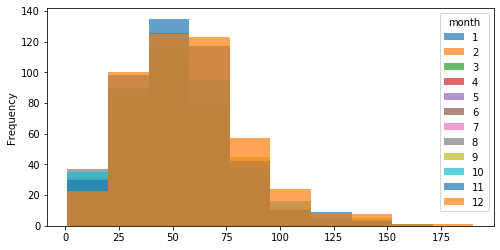

In [17]:
users_calls_sum_per_month = calls.query('duration != 0').pivot_table(index='user_id',columns='month', values='duration', aggfunc='count').reset_index()
users_calls_sum_per_month = users_calls_sum_per_month.fillna(0) # заменим получившиеся пропущенные значения на 0
users_calls_sum_per_month.info()
for item in range(12): # преобразуем полученные значения в целочисленные
    users_calls_sum_per_month[item+1] = users_calls_sum_per_month[item+1].astype('int')
users_calls_sum_per_month.info()
display(users_calls_sum_per_month.head())
calls.query('duration != 0').pivot_table(index='user_id',columns='month', values='duration', aggfunc='count').plot(kind='hist', figsize=(8,4), alpha=0.7)

Большинство пользователей совершает в месяц от 25 до 75 звонков.

Определим для каждого пользователя количество израсходованных минут разговора по месяцам:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 1000 to 1499
Data columns (total 12 columns):
1     498 non-null int64
2     498 non-null int64
3     498 non-null int64
4     498 non-null int64
5     498 non-null int64
6     498 non-null int64
7     498 non-null int64
8     498 non-null int64
9     498 non-null int64
10    498 non-null int64
11    498 non-null int64
12    498 non-null int64
dtypes: int64(12)
memory usage: 50.6 KB


month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0,0,0,0,159,172,340,408,466,350,338,333
1001,0,0,0,0,0,0,0,0,0,0,430,414
1002,0,0,0,0,0,117,214,289,206,212,243,236
1003,0,0,0,0,0,0,0,380,961,855,824,802
1004,0,0,0,0,35,171,135,137,117,145,117,130


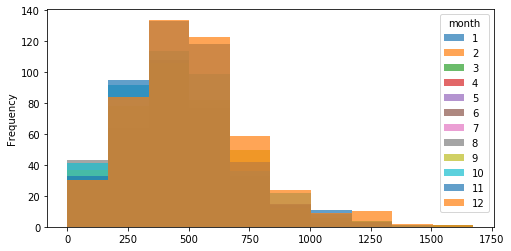

In [18]:
users_calls_trafic_per_month = traffic.pivot_table(index='user_id',columns='month', values='duration_total', aggfunc='sum')
users_calls_trafic_per_month = users_calls_trafic_per_month.fillna(0) #пропущенные значения заменим на 0
for item in range(12): # преобразуем полученные значения в целочисленные
    users_calls_trafic_per_month[item+1] = users_calls_trafic_per_month[item+1].astype('int')
users_calls_trafic_per_month.info()
display(users_calls_trafic_per_month.head())
traffic.pivot_table(index='user_id',columns='month', values='duration_total', aggfunc='sum').plot(kind='hist', figsize=(8,4), alpha=0.7)

Большинство пользователей выговаривает от 150 до 650 минут в месяц.

Количество отправленных сообщений по месяцам для каждого пользователя:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 1000 to 1499
Data columns (total 12 columns):
1     498 non-null int64
2     498 non-null int64
3     498 non-null int64
4     498 non-null int64
5     498 non-null int64
6     498 non-null int64
7     498 non-null int64
8     498 non-null int64
9     498 non-null int64
10    498 non-null int64
11    498 non-null int64
12    498 non-null int64
dtypes: int64(12)
memory usage: 50.6 KB


month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0,0,0,0,22,60,75,81,57,73,58,70
1001,0,0,0,0,0,0,0,0,0,0,0,0
1002,0,0,0,0,0,4,11,13,4,10,16,12
1003,0,0,0,0,0,0,0,37,91,83,94,75
1004,0,0,0,0,95,134,181,151,146,165,158,162


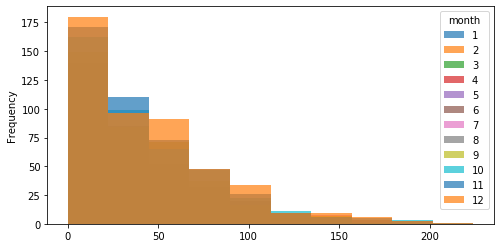

In [19]:
users_sms_per_month = traffic.pivot_table(index='user_id',columns='month', values='messages_total', aggfunc='sum')
users_sms_per_month = users_sms_per_month.fillna(0)
for item in range(12): # преобразуем полученные значения в целочисленные
    users_sms_per_month[item+1] = users_sms_per_month[item+1].astype('int')
users_sms_per_month.info()
display(users_sms_per_month.head())
traffic.pivot_table(index='user_id',columns='month', values='messages_total', aggfunc='sum').plot(kind='hist', figsize=(8,4), alpha=0.7)

Большинство пользователей отправляет до 70 сообщений в месяц.

Объем израсходованного интернет-трафика по месяцам для каждого пользователя:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 1000 to 1499
Data columns (total 12 columns):
1     498 non-null int64
2     498 non-null int64
3     498 non-null int64
4     498 non-null int64
5     498 non-null int64
6     498 non-null int64
7     498 non-null int64
8     498 non-null int64
9     498 non-null int64
10    498 non-null int64
11    498 non-null int64
12    498 non-null int64
dtypes: int64(12)
memory usage: 50.6 KB


month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0,0,0,0,3,23,14,14,15,15,15,10
1001,0,0,0,0,0,0,0,0,0,0,18,14
1002,0,0,0,0,0,11,18,20,17,14,19,18
1003,0,0,0,0,0,0,0,9,13,15,12,10
1004,0,0,0,0,14,18,22,28,15,19,16,18


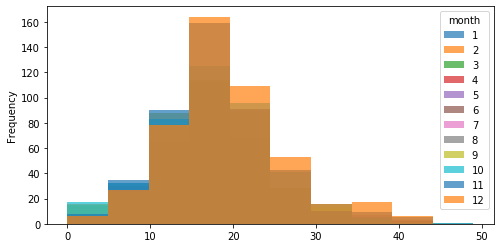

In [20]:
users_internet_trafic_per_month = traffic.pivot_table(index='user_id',columns='month', values='gb_used_total', aggfunc='sum')
users_internet_trafic_per_month = users_internet_trafic_per_month.fillna(0)
for item in range(12): # преобразуем полученные значения в целочисленны
    users_internet_trafic_per_month[item+1] = users_internet_trafic_per_month[item+1].astype('int')
users_internet_trafic_per_month.info()
display(users_internet_trafic_per_month.head())
traffic.pivot_table(index='user_id',columns='month', values='gb_used_total', aggfunc='sum').plot(kind='hist', figsize=(8,4), alpha=0.7)

Большинство пользователей скачивает от 10 до 25 Гб интернет-трафика в месяц.

In [21]:
traffic.head()

,user_id,month,duration_total,gb_used_total,messages_total,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159,3,22,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
1,1000,6,172,23,60,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
2,1000,7,340,14,75,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
3,1000,8,408,14,81,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
4,1000,9,466,15,57,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1


Вычислим помесячную выручку от каждого пользователя. Для подсчета создадим функцию revenue_calculation


In [22]:
def revenue_calculation(row):
    revenue_min = 0 # переменная для подсчета стоимости минут, потраченных сверх пакета
    revenue_gb = 0 # переменная для подсчета стоимости интернет трафика,потраченного сверх пакета 
    revenue_sms = 0 # переменная для подсчета стоимости сообщений, потраченных сверх пакета
    if row['duration_total'] > row['minutes_included']: # условие, преверяющее, потрачены ли минуты из пакета
        revenue_min =  (row['duration_total'] - row['minutes_included']) * row['rub_per_minute']
    if row['gb_used_total'] > row['gb_per_month_included']: # условие, преверяющее, потрачен ли интернет трафик из пакета
        revenue_gb =  (row['gb_used_total'] - row['gb_per_month_included']) * row['rub_per_gb']
    if row['messages_total'] > row['messages_included']: # условие, преверяющее, потрачены ли минуты из пакета
        revenue_sms =  (row['messages_total'] - row['messages_included']) * row['rub_per_message']
    revenue_tariff = row['rub_monthly_fee'] + revenue_min + revenue_gb + revenue_sms # сумируем абонентскую плату и стоимость трафика сверх пакета
    return revenue_tariff
traffic['revenue_tariff'] = traffic.apply(revenue_calculation, axis = 1)
traffic.sort_values(by='revenue_tariff', ascending = False).head() # выведем строки с 5ю самыми большими затратами на связь

,user_id,month,duration_total,gb_used_total,messages_total,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_tariff
3106,1486,12,1007,38,83,35,NaN,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart,50,15,500,550,200,3,3,6770
260,1042,12,728,37,75,42,NaN,Хабаровск,Константин,Добрынин,2018-11-25,smart,50,15,500,550,200,3,3,5709
3105,1486,11,764,36,96,35,NaN,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart,50,15,500,550,200,3,3,5680
1622,1261,12,1074,32,22,46,NaN,Казань,Мадина,Пантелеева,2018-10-30,smart,50,15,500,550,200,3,3,5672
1793,1286,12,739,35,68,19,NaN,Москва,Рашид,Троицкий,2018-11-27,smart,50,15,500,550,200,3,3,5321


Выручка по месяцам для каждого пользователя:

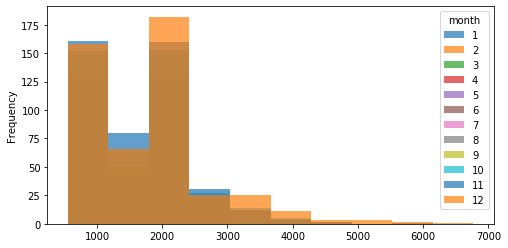

In [23]:
traffic.pivot_table(index='user_id',columns='month', values='revenue_tariff', aggfunc='mean').plot(kind='hist', figsize=(8,4), alpha=0.7)

Большинсвто пользователей тратят на связь от 500  до 2500 руб. На графике видны 2 пиковых значния, вероятно, что левый пик(от 500 до 1250 руб.) значения тарифа Смарт, правый (от 1750 до 2500 руб0) - Ультра.

## Анализ и описание данных ##

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

Для анализа трафика (минут, сообщений и интернет) по каждому тарифу создадим таблицы для каждого тарифа:

In [24]:
traffic_smart = traffic.query('tariff == "smart"')
traffic_ultra = traffic.query('tariff == "ultra"')
print('Информация по параметрам тарифа "Smart":')
display(traffic_smart[['duration_total','gb_used_total','messages_total']].describe())
print('Информация по параметрам тарифа "Ultra":')
traffic_ultra[['duration_total','gb_used_total','messages_total']].describe()

Информация по параметрам тарифа "Smart":


,duration_total,gb_used_total,messages_total
count,2223.000000,2227.000000,1922.000000
mean,419.062978,16.343511,38.716441
std,189.325618,5.728752,26.787949
min,0.000000,1.000000,1.000000
25%,285.000000,13.000000,17.000000
50%,423.000000,17.000000,34.000000
75%,545.500000,20.000000,55.000000
max,1435.000000,38.000000,143.000000


Информация по параметрам тарифа "Ultra":


,duration_total,gb_used_total,messages_total
count,951.000000,974.000000,795.000000
mean,545.451104,19.714579,61.161006
std,306.925754,9.687335,45.931026
min,0.000000,1.000000,1.000000
25%,310.000000,12.000000,24.000000
50%,528.000000,19.000000,51.000000
75%,756.500000,27.000000,87.500000
max,1673.000000,49.000000,224.000000


Проанализируем сколько минут разговора требуется пользователям каждого тарифа в месяц:

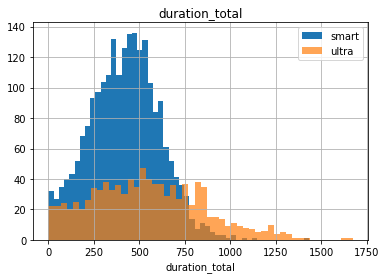

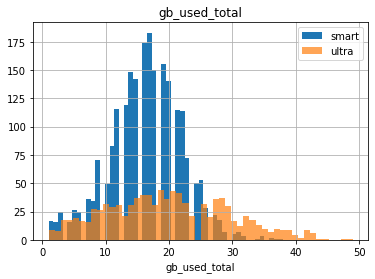

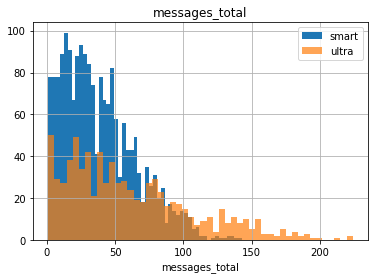

In [25]:
list_to_analize = ['duration_total','gb_used_total','messages_total']
for item in list_to_analize:
    fig, ax = plt.subplots()
    traffic_smart[item].hist(bins=50, label = 'smart')
    traffic_ultra[item].hist(bins=50, alpha=0.7, label = 'ultra')
    ax.set_xlabel(item)
    ax.set_title(item)
    ax.legend()

На графиках видны явные выбросы, необходимо избавиться от них. Для определения выбросов построим ящик с усами для каждого тарифа по параметрам минуты, интернет, сообщения. 

**1. Для тарифа Smart**

count    2223.000000
mean      419.062978
std       189.325618
min         0.000000
25%       285.000000
50%       423.000000
75%       545.500000
max      1435.000000
Name: duration_total, dtype: float64


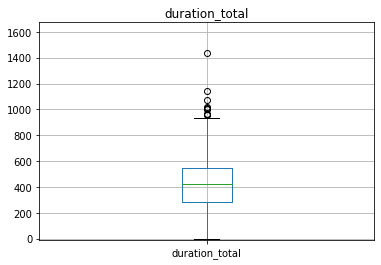

В таблице duration_total необходимо отсечь все значения более 936.25 

count    2211.000000
mean       16.317503
std         5.713488
min         1.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        37.000000
Name: gb_used_total, dtype: float64


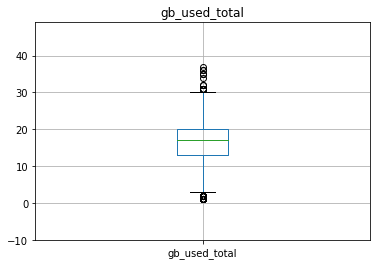

В таблице gb_used_total необходимо отсечь все значения менее 2.5  и более 30.5 

8       18
9       14
10      11
11      18
12      20
        ..
3168    22
3169    21
3171    18
3172    18
3173    13
Name: gb_used_total, Length: 2162, dtype: Int64
count    1865.000000
mean       39.169973
std        26.646662
min         1.000000
25%        18.000000
50%        34.000000
75%        56.000000
max       143.000000
Name: messages_total, dtype: float64


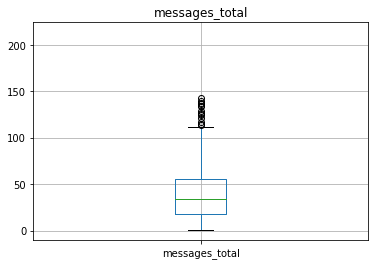

В таблице messages_total необходимо отсечь все значения более 113.0 

Очищенные значения тарифа Smart в таблице "traffic_smart":


,user_id,month,duration_total,gb_used_total,messages_total,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_tariff
10,1002,6,117,11,4,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,50,15,500,550,200,3,3,550
11,1002,7,214,18,11,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,50,15,500,550,200,3,3,1150
12,1002,8,289,20,13,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,50,15,500,550,200,3,3,1550
13,1002,9,206,17,4,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,50,15,500,550,200,3,3,950
14,1002,10,212,14,10,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,50,15,500,550,200,3,3,550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3168,1498,9,471,22,44,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15,500,550,200,3,3,1950
3169,1498,10,247,21,42,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15,500,550,200,3,3,1750
3171,1499,10,449,18,48,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15,500,550,200,3,3,1150
3172,1499,11,612,18,59,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15,500,550,200,3,3,1513


In [26]:
for item in list_to_analize:
    traffic_smart_stats = traffic_smart[item].describe()
    print(traffic_smart_stats)
    maxx = max(traffic[item])
    fig, ax = plt.subplots()
    plt.ylim(-10, maxx)
    traffic_smart.boxplot(item)
    ax.set_title(item)
    plt.show()
    IQR = traffic_smart_stats['75%'] - traffic_smart_stats['25%']
    right_edge = traffic_smart_stats['75%']+ 1.5*IQR
    left_edge = traffic_smart_stats['25%']- 1.5*IQR
    if left_edge > 0:
        print('В таблице',item,'необходимо отсечь все значения менее',left_edge,' и более',right_edge ,'\n')
        traffic_smart = traffic_smart[(traffic_smart[item] < right_edge)&(traffic_smart[item]>left_edge)]
        print(traffic_smart[item])
    else:
        print('В таблице',item,'необходимо отсечь все значения более',right_edge ,'\n')
        traffic_smart = traffic_smart[traffic_smart[item] < right_edge]
print('Очищенные значения тарифа Smart в таблице "traffic_smart":')
traffic_smart

**2. Для тарифа Ultra:**

count     951.000000
mean      545.451104
std       306.925754
min         0.000000
25%       310.000000
50%       528.000000
75%       756.500000
max      1673.000000
Name: duration_total, dtype: float64


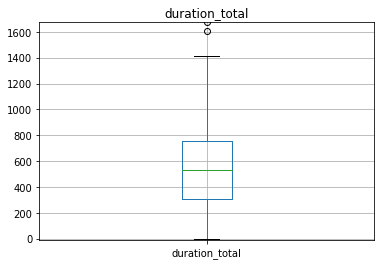

В таблице duration_total необходимо отсечь все значения более 1426.25 

count    938.000000
mean      19.744136
std        9.709142
min        1.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: gb_used_total, dtype: float64


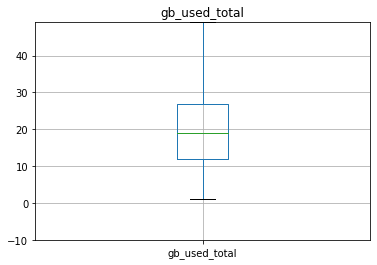

В таблице gb_used_total необходимо отсечь все значения более 49.5 

count    749.000000
mean      61.805073
std       44.821624
min        1.000000
25%       25.000000
50%       53.000000
75%       89.000000
max      224.000000
Name: messages_total, dtype: float64


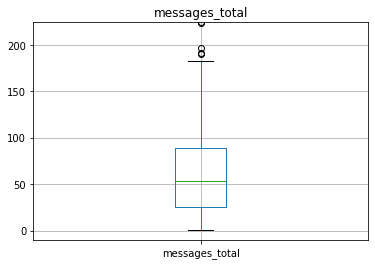

В таблице messages_total необходимо отсечь все значения более 185.0 

Очищенные значения тарифа Ultra:


,user_id,month,duration_total,gb_used_total,messages_total,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_tariff
0,1000,5,159,3,22,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950
1,1000,6,172,23,60,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950
2,1000,7,340,14,75,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950
3,1000,8,408,14,81,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950
4,1000,9,466,15,57,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3146,1495,8,92,3,13,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra,1000,30,3000,1950,150,1,1,1950
3147,1495,9,813,33,82,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra,1000,30,3000,1950,150,1,1,2400
3148,1495,10,1030,29,82,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra,1000,30,3000,1950,150,1,1,1950
3149,1495,11,954,39,79,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra,1000,30,3000,1950,150,1,1,3300


In [27]:
for item in list_to_analize:
    traffic_ultra_stats = traffic_ultra[item].describe()
    print(traffic_ultra_stats)
    maxx = max(traffic[item])
    fig, ax = plt.subplots()
    plt.ylim(-10, maxx)
    traffic_ultra.boxplot(item)
    ax.set_title(item)
    plt.show()
    IQR = traffic_ultra_stats['75%'] - traffic_ultra_stats['25%']
    right_edge = traffic_ultra_stats['75%']+ 1.5*IQR
    left_edge = traffic_ultra_stats['25%']- 1.5*IQR
    if left_edge > 0:
        print('В таблице',item,'необходимо отсечь все значения менее',left_edge,' и более',right_edge ,'\n')
        traffic_ultra = traffic_ultra[(traffic_ultra[item] < right_edge)&(traffic_ultra[item]>left_edge)]
        print(traffic_ultra[item])
    else:
        print('В таблице',item,'необходимо отсечь все значения более',right_edge ,'\n')
        traffic_ultra = traffic_ultra[traffic_ultra[item] < right_edge]
print('Очищенные значения тарифа Ultra:')
traffic_ultra

Выручка в тарифе Смарт сильнее зависит от скачанного объема интернета чем в тарифе Ультра.

Найдем среднние значения потребления трафика(минут, интернета и сообщений) по каждому тарифу

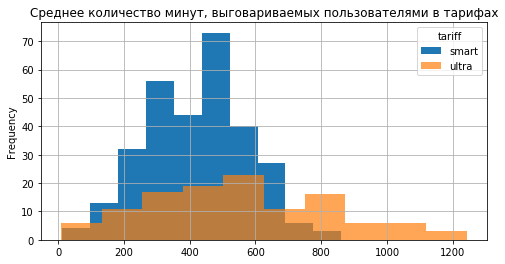

In [29]:
ax=(traffic_smart.pivot_table(index='user_id', columns='tariff',values='duration_total',aggfunc='mean')
.plot(kind='hist', figsize=(8, 4), grid=True))
ax.set_title('Среднее количество минут, выговариваемых пользователями в тарифах')
(traffic_ultra.pivot_table(index='user_id', columns='tariff', values='duration_total',aggfunc='mean')
.plot(kind='hist', figsize=(8, 4), grid=True, ax=ax, alpha=0.7))
#'gb_used_total','messages_total'

Значения количества минут, потраченных пользователями, распределены нормально. Пользователи тарифа "Ультра" выговаривают гораздо больше минут нежели польователи тарифа "Смарт", однако часть абонентов тарифа "Смарт" тратят минуты сверх пакета, т.е. пакета в 500 минут, предусмотренного тарифом, им недостаточно.

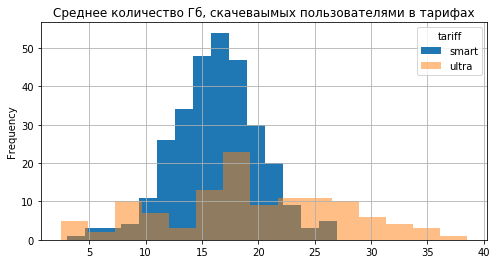

In [30]:
ax=(traffic_smart.pivot_table(index='user_id', columns= 'tariff', values='gb_used_total',aggfunc='mean')
.plot(kind='hist', bins=15, figsize=(8, 4), grid=True, alpha=1))
ax.set_title('Среднее количество Гб, скачеваымых пользователями в тарифах')
(traffic_ultra.pivot_table(index='user_id', columns= 'tariff', values='gb_used_total',aggfunc='mean')
.plot(kind='hist',bins=15, figsize=(8, 4), grid=True, ax=ax, alpha=0.5))


Значения количества интернет трафика, потраченного пользователями, распределены нормально. Пользователи тарифа Ультра тратят  больше интернета нежели польователи тарифа "Смарт", однако большая часть абонентов тарифа "Смарт" тратят Гб сверх пакета, т.е. пакета в 15 минут, предусмотренного тарифом, им недостаточно.

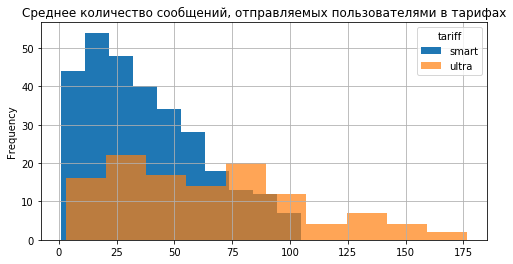

In [31]:
ax=(traffic_smart.pivot_table(index='user_id', columns= 'tariff', values='messages_total',aggfunc='mean')
.plot(kind='hist', figsize=(8, 4), grid=True))
ax.set_title('Среднее количество сообщений, отправляемых пользователями в тарифах')
(traffic_ultra.pivot_table(index='user_id', columns= 'tariff', values='messages_total',aggfunc='mean')
.plot(kind='hist', figsize=(8, 4), grid=True, ax=ax, alpha=0.7))


Распределения значений сообщений, потраченных пользователями, имеют скошенность в положительную сторону, пользователи тарифа "Ультра" тратят гораздо больше сообщений нежели польователи тарифа "Смарт", однако часть абонентов тарифа "Смарт" тратят сообщения сверх пакета, т.е. пакета в 50 сообщений, предусмотренного тарифом, им недостаточно.

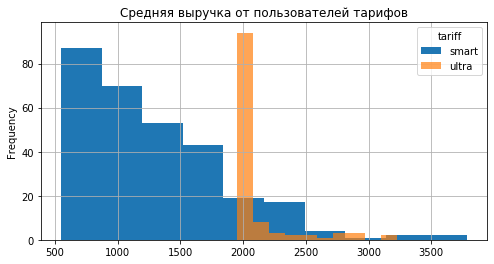

In [32]:
ax=(traffic_smart.pivot_table(index='user_id', columns= 'tariff', values='revenue_tariff',aggfunc='mean')
.plot(kind='hist', figsize=(8, 4), grid=True))
ax.set_title('Средняя выручка от пользователей тарифов')
(traffic_ultra.pivot_table(index='user_id', columns= 'tariff', values='revenue_tariff',aggfunc='mean')
.plot(kind='hist', figsize=(8, 4), grid=True, ax=ax, alpha=0.7))

Распределения значений выручки от пользователями имеют скошенность в положительную сторону. Пользователи тарифа Ультра приносят гораздо больше выручки нежели пользователи тарифа Смарт. Однако  абоненты тарифа Смарт, часто приносят выручку большую, чем абонентская плата на тарифе(550 руб.), вследствие перерасхода пакетов трафика включенного в тариф.

Рассчитаем значения дисперсии и стандартного отклонения для показателей трафика и выручки пользователей тарифов:

In [33]:
print('Дисперсия и стандартное отклонение значений трафика и выручки для тарифа Smart')
display(traffic_smart.pivot_table(index='tariff',values=['duration_total','gb_used_total','messages_total','revenue_tariff'], aggfunc=['var','std']).round(2))
print('Дисперсия и стандартное отклонение значений трафика и выручки для тарифа Ultra')
traffic_ultra.pivot_table(index='tariff',values=['duration_total','gb_used_total','messages_total','revenue_tariff'], aggfunc=['var','std']).round(2)

Дисперсия и стандартное отклонение значений трафика и выручки для тарифа Smart


var                                              \
       duration_total gb_used_total messages_total revenue_tariff   
tariff                                                              
smart        31616.52         27.19         654.35      547624.43   

                  std                                              
       duration_total gb_used_total messages_total revenue_tariff  
tariff                                                             
smart          177.81          5.21          25.58         740.02

Дисперсия и стандартное отклонение значений трафика и выручки для тарифа Ultra


var                                              \
       duration_total gb_used_total messages_total revenue_tariff   
tariff                                                              
ultra        94321.67         86.71        1882.01      106353.11   

                  std                                              
       duration_total gb_used_total messages_total revenue_tariff  
tariff                                                             
ultra          307.12          9.31          43.38         326.12

Значения дисперсии выручки тарифов отличаются друго от друга, применим полученное наболюдение в следующем этапе исследования

## Проверка гипотез

Сформулируем нулевую гипотезу: средняя выручка пользователей тарифов «Ультра» и «Смарт» равны. В качестве альтернативной  гипотезы принимаем: средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны.
Выборки тарифов имеют разные размеры, их дисперсии разные, параметр equal_var = False

In [37]:
traffic_smart['revenue_tariff']

10       550
11      1150
12      1550
13       950
14       550
        ... 
3168    1950
3169    1750
3171    1150
3172    1513
3173     598
Name: revenue_tariff, Length: 1851, dtype: int64

In [34]:
alpha = 0.05 

results = st.ttest_ind(traffic_smart['revenue_tariff'],traffic_ultra['revenue_tariff'],equal_var = False)
print('p-значение: ', results.pvalue) 
if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу") 
else: 
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  2.0228209865307776e-248
Отвергаем нулевую гипотезу


Таким образом алтернативная гипотеза верна: средняя выручка пользователей тарифов «Ультра» и «Смарт» разные.

Теперь сравним  выручку пользователй из Москвы с выручкой пользоватей из других городов.

Сформулируем нулевую гипотезу: средняя выручка пользователей из Москвы и выручки пользователей из других регионов равны. В качестве альтернативной гипотезы принимаем: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [35]:
other_city_revenue = traffic[traffic['city'] != 'Москва']['revenue_tariff']
moscow_revenue = traffic[traffic['city'] == 'Москва']['revenue_tariff']
print('Дисперсия выручки пользователей Москвы',traffic.query('city == "Москва"')['revenue_tariff'].var().round(2))
print('Дисперсия выручки пользователей Москвы',traffic.query('city == "Москва"')['user_id'].count())
print('Количество пользователей других городов',traffic.query('city != "Москва"')['revenue_tariff'].var().round(2))
print('Количество пользователей других городов',traffic.query('city != "Москва"')['user_id'].count())

Дисперсия выручки пользователей Москвы 565636.47
Дисперсия выручки пользователей Москвы 611
Количество пользователей других городов 654137.63
Количество пользователей других городов 2603


Выборки тарифов имеют разные размеры, их дисперсии разные, параметр equal_var = False

In [36]:
alpha = 0.05 
results = st.ttest_ind(other_city_revenue,moscow_revenue)
print('p-значение: ', results.pvalue) 
if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу") 
else: 
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


Таким образом наша гипотеза подтвержается: средняя выручка пользователей из Москвы и выручки пользователей из других регионов равны.

## Общий вывод

В ходе исследования была обработана информация об абонентах сотовой компаниии "Мегалайн" - пользователях двух тарифных планов «Смарт» и «Ультра». Были объеденены несколько таблиц с данными для получения полной информации по трафику абонентов. Произведен расчет выручки, приносимой каждым абонентом за определенный месяц. 

Пользователи высокомаржинального тарифа "Ультра" в среднем потребляют большее количество трафика(минут, сообщений, Гб) и как следствие, приносят больше выручки. Однако число пользователей тарифа Смарт значительно больше и часть абонентов перерасходуют  количество трафика, содержащегося в тарифе. Преимущественно им не хвататет пакета интернета. А значит, для получения большей выручки, можно определенному количеству абонентов тарифа "Смарт" предложить переход на тариф "Ультра", либо же акцентировать внимание на его продвижение для новых абонентов.